## 线性回归

### 简单的线性回归

In [1]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])

### 线性回归预测糖尿病

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X, diabetes_y

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [7]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 1]
diabetes_X

IndexError: index 1 is out of bounds for axis 1 with size 1

In [8]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


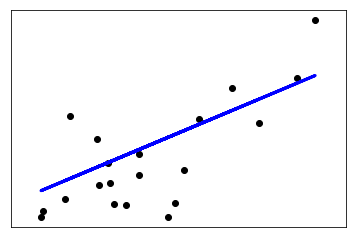

In [10]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


### 非负最小二乘法

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [13]:
# 生成随机数据
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
X

array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  1.05712223,
         0.34361829, -1.76304016],
       [ 0.32408397, -0.38508228, -0.676922  , ...,  0.26105527,
         0.00511346, -0.23458713],
       [-1.41537074, -0.42064532, -0.34271452, ..., -1.32045661,
         0.52194157,  0.29698467],
       ...,
       [-0.63919353, -0.15627634,  0.68677407, ..., -0.27027037,
         1.61286837,  0.94661831],
       [ 0.93465471,  0.36992561, -1.11732701, ..., -0.61403816,
        -0.19807363,  1.3006254 ],
       [ 0.86780546,  0.22740508, -0.88984477, ..., -0.70531672,
         0.49576557,  0.64438845]])

In [14]:
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
true_coef

array([0.        , 0.        , 0.        , 0.33125414, 3.59153559,
       0.        , 3.00246149, 0.        , 0.        , 2.45578386,
       2.76580913, 2.55422981, 0.        , 0.        , 2.46896578,
       0.12462552, 0.        , 1.37495382, 0.        , 5.38357455,
       4.63452439, 1.81229228, 4.08302011, 0.19437405, 2.29631248,
       4.43316089, 0.73649605, 0.        , 0.        , 0.        ,
       2.47026955, 2.83690028, 1.5130952 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.85566907, 5.95702923,
       0.37058761, 0.        , 0.        , 0.3731543 , 0.        ,
       0.36059568, 1.35243701, 0.62905819, 1.3726258 , 1.30124283])

In [15]:
y = np.dot(X, true_coef)
y

array([ -2.88045444,   8.80952654,   7.03475169,  -8.99813711,
        28.4772444 ,   9.30957584, -10.04686457,   1.47355524,
         1.10906887, -11.83766393, -28.14693988,  -2.84637104,
         4.94483383,   7.24295538,  -9.26436119,   0.48178785,
        14.27058969,  23.54874191,  -2.02417806,  -0.90170159,
        27.90388446,  -9.39486657,  33.40665946,  13.70589132,
         7.7076723 ,  11.9360984 ,  -2.74566373,  -8.56683245,
         9.41061617,  24.09556198,   1.06179611,   2.71713244,
         9.34298734,  10.93865123,  22.17892245,   7.70186432,
        -6.76420785,  20.13331257, -13.28523958,  -7.87994617,
       -27.78858302,  12.41311933,  -6.75353442,   7.18544907,
         0.99356975,  -2.21380146,  10.22984982,   8.48312685,
        -6.15927986,  11.23290235,   7.63830288, -15.29302889,
        13.30938299, -10.12182751,  35.82539238,  -6.27900997,
        -6.21700025, -17.75117895,  -5.92518324,   4.27905487,
        -6.06598141,   8.62764775, -11.80151008, -14.06

In [ ]:
# Add some noise
y += 5 * np.random.normal(size=(n_samples, ))

In [16]:
# 分割测试数据和拟合数据
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [17]:
# 使用非负最小二乘法
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

TypeError: __init__() got an unexpected keyword argument 'positive'

In [ ]:
# 使用常规最小二乘法

reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

In [ ]:
# 比较常规二乘法和非负二乘法的系数
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")